In [1]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm

#from my_functions import find_min_distance

In [177]:
px_size = 0.1625
dt = 15 #frame interval in seconds

In [465]:
directory = 'Baz_Jupiter//intensities_all_frames//'
title="Bazooka_ablation"
dt = 30 #frame interval in seconds


#directory = 'Par1_Baz//'
#title="Bazooka_ablation"
#dt = 60 #frame interval in seconds



#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Par1//"
#title="Par1_FRAP"

#directory = "C://Users//amilas//Desktop//Python-analysis//FRAP//Bazooka//"
#title="Bazooka_FRAP"


files = listdir(directory)

142
137
135
137
121
128
168
130
181
178
175
180


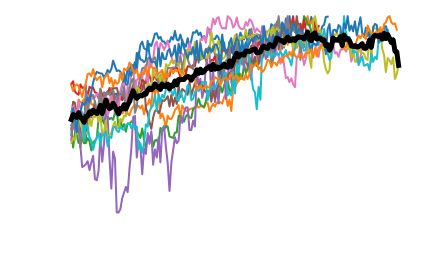

In [467]:

#COLOR = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 3))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Normalized Intensity', labelpad=10)


intensities_all = pd.DataFrame()



for index, file in enumerate(files[0::2]):
#for index, file in enumerate(files[0::4]):

    intensities = pd.read_csv(directory+file)
    background = pd.read_csv(directory+files[index*2+1])

    #subtract background
    intensities["Background_norm"] = intensities.Median - background.Median

    intensities["Mean"] = intensities.Background_norm
    
    #normalize
    if "ablation" in title:
        #intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean
    else:
    #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[2]
    
    intensities[file] = intensities["Normalized"]/intensities["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]

    #index = pd.date_range('1/1/2000', periods=len(final_intensities), freq='30s')
    #series = pd.Series(final_intensities.values, index=index)
    #final_intensities = series.resample("2 min").mean()


    print(len(intensities))
    if len(intensities)>0: #and "green" in file:
        intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
     
        ax.plot(np.arange(len(final_intensities))*dt, final_intensities, linewidth=2)

        #xs = np.arange(len(final_intensities))*dt*4
        #ys = final_intensities
        #p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess
        #popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, method='dogbox')
        #L, x0, k, b = popt
        # plot the results
        #ax.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")





intensities_all['Mean'] = intensities_all.mean(axis=1)
ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="black")



#ax.plot(xs, monoExp(xs, m, t), linewidth=5, color="black")


In [372]:
intensities_all

,20201119_Oocyte3_green.csv,20201119_Oocyte3_red.csv,20201119_Oocyte5_green.csv,20201119_Oocyte5_red.csv,Mean
0,215.0,25.5,341.5,84.0,166.500
1,214.0,33.0,328.0,77.5,163.125
2,176.0,38.0,260.5,82.5,139.250
3,190.0,54.0,209.0,77.0,132.500
4,214.0,43.0,128.0,83.5,117.125
...,...,...,...,...,...
75,NaN,NaN,60.0,165.0,112.500
76,NaN,NaN,93.5,153.0,123.250
77,NaN,NaN,81.0,178.5,129.750
78,NaN,NaN,70.0,187.5,128.750


In [16]:

fig.savefig(f'{title}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}.png', dpi=300, transparent=True, bbox_inches='tight')

#fig.savefig(f'{title}.pdf', dpi=300, transparent=False, bbox_inches='tight')
#fig.savefig(f'{title}.png', dpi=300, transparent=False, bbox_inches='tight')

In [127]:
#par1_mean = intensities_all.Mean
#baz_mean = intensities_all.Mean
baz_mean_ablation = intensities_all.Mean

NameError: name 'baz_mean' is not defined

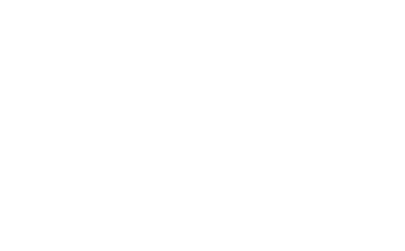

In [52]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.arange(70)*dt, baz_mean[0:70], linewidth=5, color="orange")
ax.plot(np.arange(70)*dt, par1_mean[0:70], linewidth=5, color="blue")


In [19]:
import scipy.optimize

def monoExp(x, m, t):
    return m * (1-np.exp(-t * x))

Text(0.5, 1.0, 'Original Data')

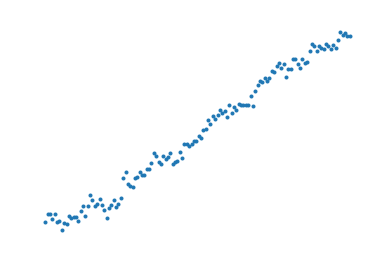

In [126]:
#xs = np.arange(34)*dt
#ys = par1_mean[2:36]


#xs = np.arange(68)*dt
#ys = baz_mean[2:70]


xs = np.arange(130)*dt
ys = baz_mean_ablation[0:130]

plt.plot(xs, ys, '.')
plt.title("Original Data")

R² = -3.247117432070068
Y = 296.79017857142856 * (1-e^(-0.6984397005801697 * x))
T_1/2 = 0.992422366575342


C:\Users\amilas\Miniconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


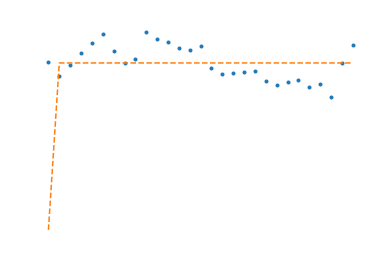

In [408]:
# perform the fit
#p0=[1,1]
p0 = [1, -np.log(0.5)/300]
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * (1-e^(-{t} * x))")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")

[ 8.94196434e-01  1.49360321e+03  1.50716629e-03 -1.68830989e-01]


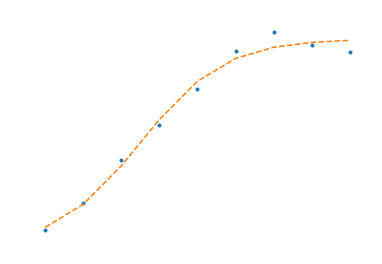

In [470]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

baz_mean_ablation = intensities_all.Mean
ys = baz_mean_ablation[0:-15]
#ys = baz_mean_ablation

index = pd.date_range('1/1/2000', periods=len(ys), freq='30s')
series = pd.Series(ys.values, index=index)
ys = series.resample("10 min").mean()

xs = np.arange(len(ys))*dt*20


p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess

popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, maxfev = 10000)#, method='dogbox')

L, x0, k, b = popt

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")
plt.title("Fitted Sigmoidal Curve")
print(popt)



In [397]:
intensities_all


,20201119_Oocyte3_red.csv,20201119_Oocyte7_red.csv,20201126_Oocyte1_red.csv,Mean
0,25.5,56.0,54.0,45.166667
1,33.0,68.0,65.0,55.333333
2,38.0,51.5,67.0,52.166667
3,54.0,49.0,69.0,57.333333
4,43.0,54.0,88.0,61.666667
...,...,...,...,...
76,NaN,131.0,218.0,174.500000
77,NaN,143.0,226.0,184.500000
78,NaN,134.0,226.0,180.000000
79,NaN,NaN,224.0,224.000000
